In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from nltk.stem.porter import PorterStemmer
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D






In [50]:
pip install wordcloud


     -------------------------------------- 152.9/152.9 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf

In [21]:
data = pd.read_csv(r"C:\Users\karthick\Downloads\all-data.csv", names=['Label', 'Text'])

In [22]:
data

,Label,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4846 non-null   object
 1   Text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


# Data Visualization

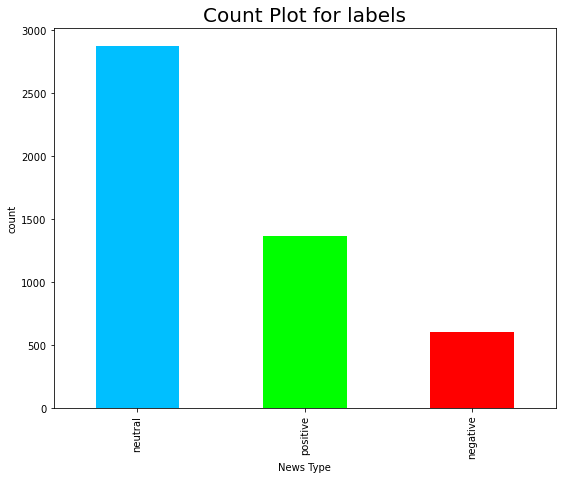

In [46]:
# Count plot for labels feature
plt.figure(figsize=(9,7))
data.Label.value_counts().plot(kind='bar',color=['deepskyblue','lime','red'])
plt.xlabel("News Type")
plt.ylabel("count")
plt.title("Count Plot for labels",{'fontsize':20});

In [51]:
from wordcloud import WordCloud, STOPWORDS

In [52]:
import matplotlib.pyplot as plt

In [60]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
    stopwords= set(STOPWORDS)
    ).generate(str(data))                
 

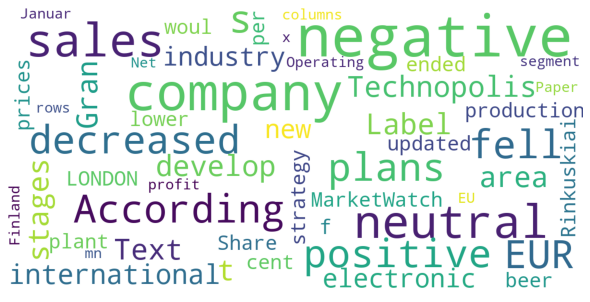

In [61]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [62]:
new_stopwords = ['many','According','know','new','price','see',
                 'use','go','much','due']

In [66]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

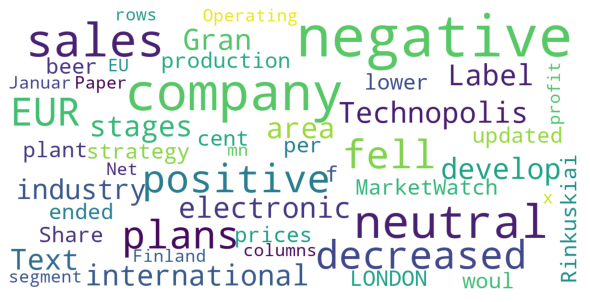

In [67]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        stopwords= stpwrd
    ).generate(str(data))                
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Pre Processing

In [6]:
def get_sequences(texts):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    
    
    sequences = tokenizer.texts_to_sequences(texts)
    print("Vocab length", len(tokenizer.word_index) + 1)
    
    max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
    print("Max sequence length", max_seq_length)
    
    sequences = pad_sequences(sequences, maxlen = max_seq_length, padding = 'post')
    
    return sequences

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    sequences = get_sequences(df['Text'])
    
    label_mapping = {
        'negative': 0,
        'neutral': 1,
        'positive': 2
    }
    
    y = df['Label'].replace(label_mapping)
    
    train_sequences, test_sequences, y_train, y_test = train_test_split(sequences, y, train_size = 0.7, shuffle = True, random_state = 1)
    
    
    return train_sequences, test_sequences, y_train, y_test

In [8]:
train_sequences, test_sequences, y_train, y_test = preprocess_inputs(data)

Vocab length 10115
Max sequence length 71


In [9]:
train_sequences

array([[5436,  511,   16, ...,    0,    0,    0],
       [  22, 1627,    4, ...,    0,    0,    0],
       [1141,  937,  136, ...,    0,    0,    0],
       ...,
       [   1,  420,   16, ...,    0,    0,    0],
       [2585,  123, 3244, ...,    0,    0,    0],
       [  30,  616,  556, ...,    0,    0,    0]])

In [10]:
y_train

545     2
2374    0
4217    1
1071    1
716     2
       ..
2895    1
2763    1
905     2
3980    1
235     2
Name: Label, Length: 3392, dtype: int64

# Training

In [11]:
inputs = tf.keras.Input(shape = (train_sequences.shape[1],))
x = tf.keras.layers.Embedding(input_dim = 10123,
                             output_dim = 128,
                             input_length = train_sequences.shape[1])(inputs)
x = tf.keras.layers.GRU(256, return_sequences =True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history = model.fit(train_sequences,
                   y_train,
                   validation_split =  0.2,
                   batch_size = 32,
                   epochs = 100,
                   callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                                patience = 3,
                                                                restore_best_weights = True)])

Epoch 1/100
85/85 [==============================] - 26s 260ms/step - loss: 0.8253 - accuracy: 0.6391 - val_loss: 0.7850 - val_accuracy: 0.6539
Epoch 2/100
85/85 [==============================] - 20s 241ms/step - loss: 0.4628 - accuracy: 0.8201 - val_loss: 0.7720 - val_accuracy: 0.7084
Epoch 3/100
85/85 [==============================] - 20s 232ms/step - loss: 0.1457 - accuracy: 0.9517 - val_loss: 1.0364 - val_accuracy: 0.7128
Epoch 4/100
85/85 [==============================] - 20s 239ms/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 1.0523 - val_accuracy: 0.7099
Epoch 5/100
85/85 [==============================] - 20s 238ms/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 1.3903 - val_accuracy: 0.7084


In [12]:
results = model.evaluate(test_sequences, y_test, verbose =  0)

print("Test Losss: {:.5f}".format(results[0]))
print("Test accuracy: {:.5f}%".format(results[1]  * 100))

Test Losss: 0.68906
Test accuracy: 74.75929%


In [24]:
!pip install transformers --user

In [14]:
from transformers import pipeline

In [32]:
pip install datasets


Note: you may need to restart the kernel to use updated packages.


In [33]:
from datasets import load_dataset 
from datasets import Dataset 

In [35]:
classifier1 = pipeline("sentiment-analysis")
                        

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceCla

In [37]:
dataset = Dataset.from_pandas(data)

In [38]:
dataset

Dataset({
    features: ['Label', 'Text'],
    num_rows: 4846
})

In [39]:
dataset["Text"]

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
 "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",
 "FINANCING OF ASPOCO

In [40]:
classifier1(dataset["Text"][:5])

[{'label': 'NEGATIVE', 'score': 0.9906287789344788},
 {'label': 'POSITIVE', 'score': 0.5637877583503723},
 {'label': 'NEGATIVE', 'score': 0.9673240184783936},
 {'label': 'POSITIVE', 'score': 0.9970834851264954},
 {'label': 'POSITIVE', 'score': 0.8617072701454163}]

In [41]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\ProgramData\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karthick\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

C:\ProgramData\Anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [44]:
summarizer(dataset["Text"][:5],max_length=80)

Your max_length is set to 80, but you input_length is only 31. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 80, but you input_length is only 40. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 80, but you input_length is only 54. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your max_length is set to 80, but you input_length is only 37. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 80, but you input_length is only 60. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[{'summary_text': 'Gran , the company has no plans to move all production to Russia . that is where the company is growing, according to Gran .'},
 {'summary_text': 'Technopolis plans to develop in stages an area of no less than 100,000 square meters . it will host companies working in computer technologies and telecommunications .'},
 {'summary_text': 'the international electronic industry company has laid off tens of employees from its Tallinn facility . contrary to earlier layoffs the company contracted the ranks of its office workers .'},
 {'summary_text': 'the company would increase its capacity to meet the expected increase in demand . it would improve the use of raw materials and therefore increase production profitability .'},
 {'summary_text': "Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 %-20 % of net sales . the company 's updated strategy for the years 2009-2012'"}]